In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

data = pd.read_excel("/content/hotel_reviews.xlsx")
print(data.head())

                                              Review  Rating
0  nice hotel expensive parking got good deal sta...     4.0
1  ok nothing special charge diamond member hilto...     2.0
2  nice rooms not 4* experience hotel monaco seat...     3.0
3  unique, great stay, wonderful time hotel monac...     5.0
4  great stay great stay, went seahawk game aweso...     5.0


# EDA

In [25]:
data.shape

(20491, 2)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  float64
dtypes: float64(1), object(1)
memory usage: 320.3+ KB


In [27]:
# Precentage of null values
(data.isna().sum()/len(data))*100

Review    0.0
Rating    0.0
dtype: float64

In [28]:
data.Rating.value_counts()

5.0    9054
4.0    6039
3.0    2184
2.0    1793
1.0    1421
Name: Rating, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Ratings of Hotel')

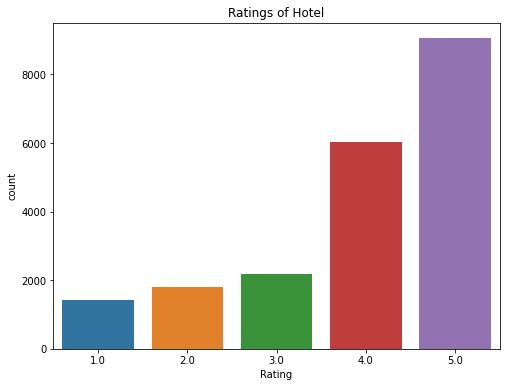

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(data["Rating"])
plt.title("Ratings of Hotel")

count    9054.000000
mean       93.963773
std        90.977999
min         7.000000
25%        44.000000
50%        69.000000
75%       111.000000
max      1755.000000
Name: Length, dtype: float64

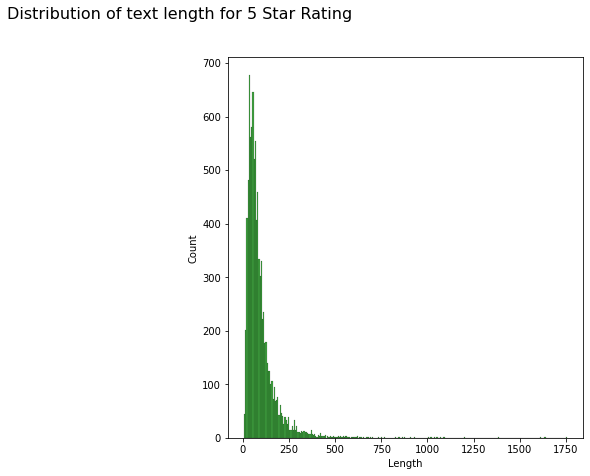

In [30]:
fig = plt.figure(figsize=(14,7))
data["Length"] = data.Review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Rating']==5]['Length'], ax=ax1,color='green')
fig.suptitle('Distribution of text length for 5 Star Rating', fontsize=16)
display(data.Length[data.Rating==5].describe())

count    1421.000000
mean      112.365236
std        99.834855
min        12.000000
25%        51.000000
50%        82.000000
75%       137.000000
max       954.000000
Name: Length, dtype: float64

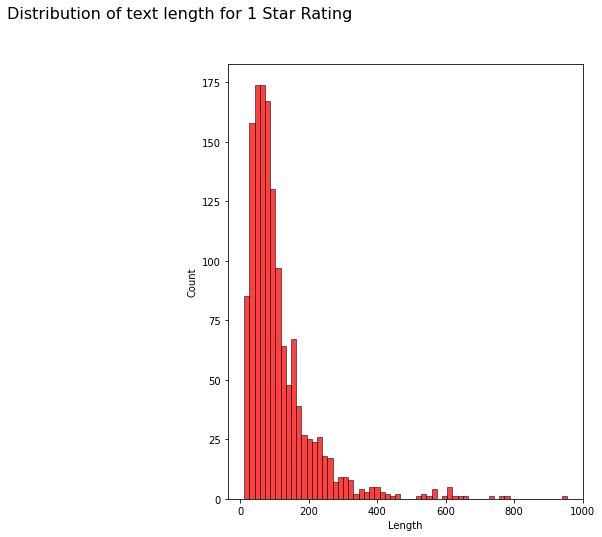

In [31]:
fig2 = plt.figure(figsize=(14,8))
ax2 = fig2.add_subplot(122)
sns.histplot(data[data["Rating"]==1]["Length"],ax=ax2,color='r')
fig2.suptitle("Distribution of text length for 1 Star Rating",fontsize=16)
display(data.Length[data.Rating==1].describe())

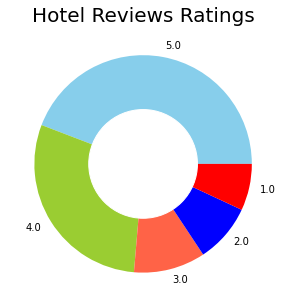

In [49]:
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)
plt.show()

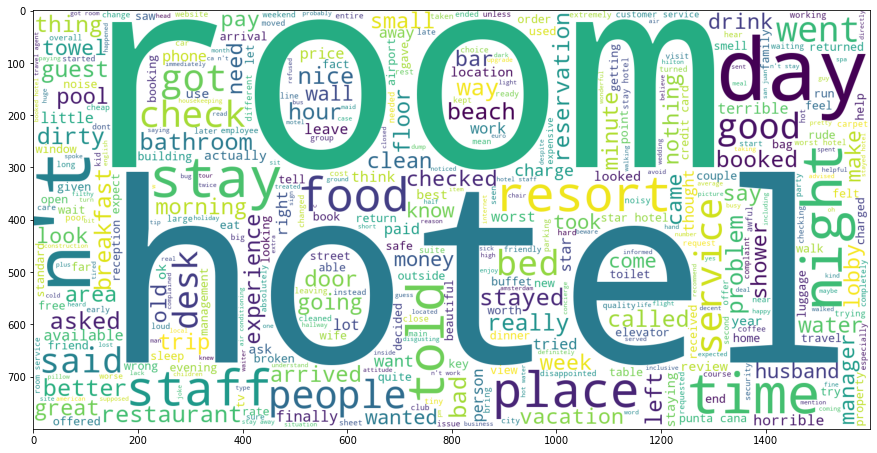

In [32]:
#WordCloud for 1 Star Rating
from wordcloud import WordCloud
plt.figure(figsize=(15,15))
wc1 = WordCloud(max_words=2000, min_font_size=10, 
                height=800,width=1600,background_color="white").generate(" ".join(data[data["Rating"]==1].Review))
plt.imshow(wc1)

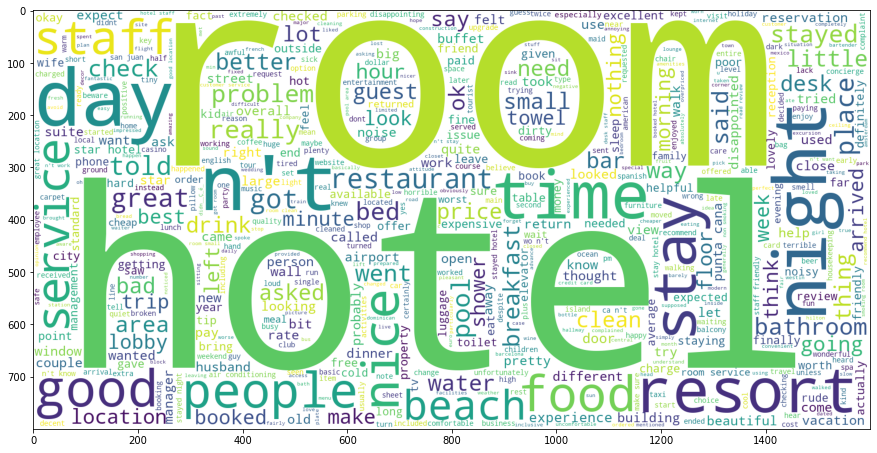

In [33]:
#WordCloud for 2 Star Rating
plt.figure(figsize=(15,15))
wc2 = WordCloud(max_words=2000, min_font_size=10, 
                height=800,width=1600,background_color="white").generate(" ".join(data[data["Rating"]==2].Review))
plt.imshow(wc2)

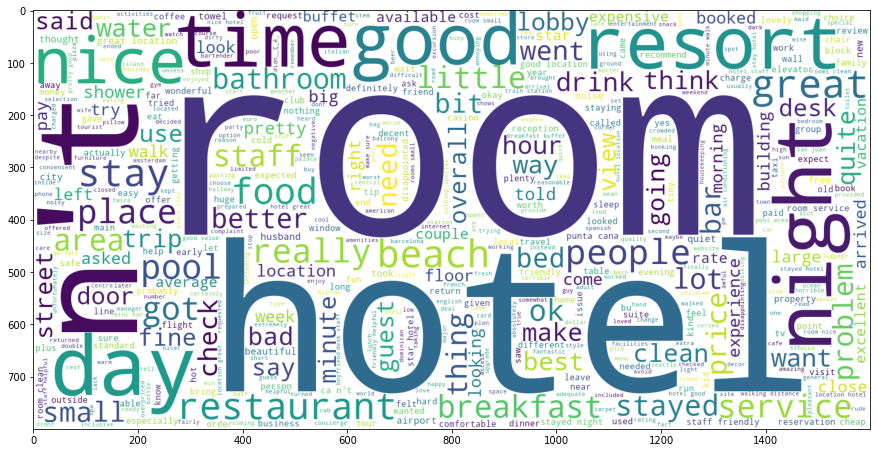

In [34]:
#WordCloud for 3 Star Rating
plt.figure(figsize=(15,15))
wc3 = WordCloud(max_words=2000, min_font_size=10, 
                height=800,width=1600,background_color="white").generate(" ".join(data[data["Rating"]==3].Review))
plt.imshow(wc3)

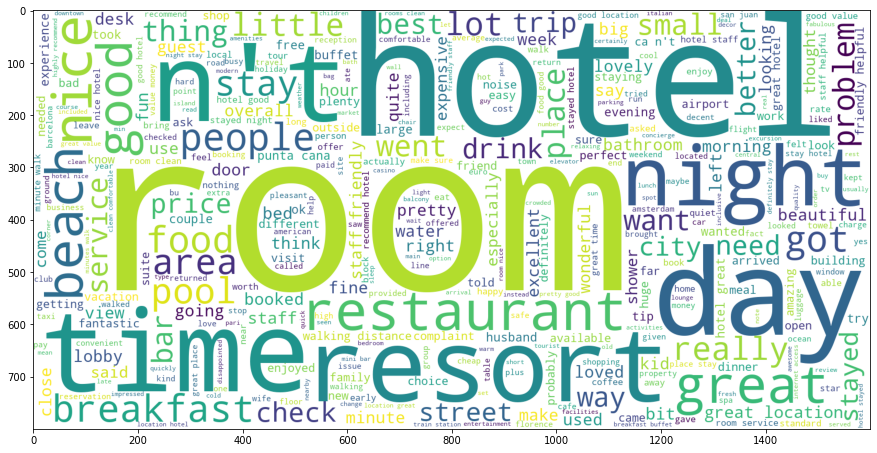

In [35]:
#WordCloud for 4 Star Rating
plt.figure(figsize=(15,15))
wc4 = WordCloud(max_words=2000, min_font_size=10, 
                height=800,width=1600,background_color="white").generate(" ".join(data[data["Rating"]==4].Review))
plt.imshow(wc4)

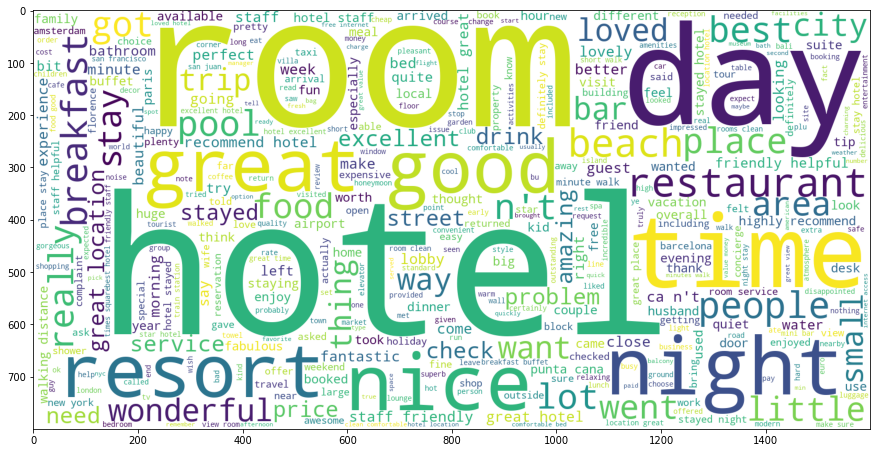

In [36]:
#WordCloud for 5 Star Rating
plt.figure(figsize=(15,15))
wc5 = WordCloud(max_words=2000, min_font_size=10, 
                height=800,width=1600,background_color="white").generate(" ".join(data[data["Rating"]==5].Review))
plt.imshow(wc5)

# NLP Approach:
1. Cleaning
2. Lemmatization
3. TF-IDF

In [37]:
# function for cleaning Review
def standardize_text(data, field):
    data[field] = data[field].str.replace(r"http\S+", "")
    data[field] = data[field].str.replace(r"http","")
    data[field] = data[field].str.replace(r"@/S+","")
    data[field] = data[field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    data[field] = data[field].str.replace(r"@"," at ")
    data[field] = data[field].str.lower()
    return data

In [38]:
standardize_text(data,"Review")

<ipython-input-37-78d987830b83>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data[field] = data[field].str.replace(r"http\S+", "")
<ipython-input-37-78d987830b83>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data[field] = data[field].str.replace(r"@/S+","")
<ipython-input-37-78d987830b83>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data[field] = data[field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")


,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,4.0,87
1,ok nothing special charge diamond member hilto...,2.0,250
2,nice rooms not 4 experience hotel monaco seat...,3.0,217
3,"unique, great stay, wonderful time hotel monac...",5.0,89
4,"great stay great stay, went seahawk game aweso...",5.0,191
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0,109
20487,great location price view hotel great quick pl...,4.0,39
20488,"ok just looks nice modern outside, desk staff ...",2.0,63
20489,hotel theft ruined vacation hotel opened sept ...,1.0,781


In [39]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Applying Lemmmatizer to remove tenses from texts.

In [40]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [41]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [42]:
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus.append(review)

In [43]:
corpus[:1]

['nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof like heard music room night morning loud bang door opening closing hear people talking hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night']

In [44]:
def sentiment(review):
    if review>=3:
        return 1
    else:
        return 0
data['Sentiment']= data['Rating'].apply(sentiment)

In [45]:
data.head(10)

,Review,Rating,Length,Sentiment
0,nice hotel expensive parking got good deal sta...,4.0,87,1
1,ok nothing special charge diamond member hilto...,2.0,250,0
2,nice rooms not 4 experience hotel monaco seat...,3.0,217,1
3,"unique, great stay, wonderful time hotel monac...",5.0,89,1
4,"great stay great stay, went seahawk game aweso...",5.0,191,1
5,love monaco staff husband stayed hotel crazy w...,5.0,134,1
6,"cozy stay rainy city, husband spent 7 nights m...",5.0,101,1
7,"excellent staff, housekeeping quality hotel ch...",4.0,85,1
8,"hotel stayed hotel monaco cruise, rooms genero...",5.0,59,1
9,excellent stayed hotel monaco past w e delight...,5.0,35,1


#Applying TF-IDF

In [46]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=10000, tokenizer = word_tokenize)
X = tfidf.fit_transform(corpus)
y = data['Sentiment']

#Sentiment Analysis

In [50]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
print(data.head())

                                              Review  Rating  Length  \
0  nice hotel expensive parking got good deal sta...     4.0      87   
1  ok nothing special charge diamond member hilto...     2.0     250   
2  nice rooms not 4  experience hotel monaco seat...     3.0     217   
3  unique, great stay, wonderful time hotel monac...     5.0      89   
4  great stay great stay, went seahawk game aweso...     5.0     191   

   Sentiment  Positive  Negative  Neutral  
0          1     0.283     0.071    0.646  
1          0     0.196     0.108    0.696  
2          1     0.211     0.107    0.682  
3          1     0.382     0.060    0.558  
4          1     0.221     0.135    0.643  


In [51]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")
sentiment_score(x, y, z)

Neutral


In [52]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  6394.630999999983
Negative:  1478.2819999999986
Neutral:  12618.152999999964
